In [11]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings for Jupyter notebooks (if applicable)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

# Statistical tests and modeling
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Optional: Machine learning setup
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score

# Optional: Working with SQL
import sqlite3


In [2]:
atp = pd.read_csv('atp_tennis.csv')
atp.head()

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,63,77,-1,-1,-1.00,-1.00,6-4 6-2
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,-1,-1,-1.00,-1.00,3-6 3-6
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,40,655,-1,-1,-1.00,-1.00,6-7 7-5 6-3
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,87,65,-1,-1,-1.00,-1.00,1-6 4-6
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,81,198,-1,-1,-1.00,-1.00,7-6 5-7 6-4


In [5]:
atp_2024_25 = atp[atp.Date >= '2024-01-01']
atp_2024_25.head()

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
61562,Brisbane International,2024-01-01,ATP250,Outdoor,Hard,1st Round,3,Safiullin R.,Shelton B.,Safiullin R.,39,17,1122,2145,2.30,1.62,6-3 6-7 6-3
61563,Brisbane International,2024-01-01,ATP250,Outdoor,Hard,1st Round,3,Purcell M.,Rune H.,Rune H.,45,8,1012,3660,4.00,1.25,6-4 4-6 2-6
61564,Brisbane International,2024-01-01,ATP250,Outdoor,Hard,1st Round,3,Dimitrov G.,Murray A.,Dimitrov G.,14,42,2570,1050,1.33,3.40,4-6 7-5 6-2
61565,Brisbane International,2024-01-02,ATP250,Outdoor,Hard,1st Round,3,Korda S.,Hanfmann Y.,Hanfmann Y.,24,51,1530,914,1.20,4.50,5-7 4-6
61566,Brisbane International,2024-01-02,ATP250,Outdoor,Hard,1st Round,3,Klein L.,Baez S.,Klein L.,170,28,359,1435,2.00,1.80,4-6 6-3 6-4


In [6]:
atp_2024_25['target'] = (atp_2024_25['Winner'] == atp_2024_25['Player_1']).astype(int)  # 1 if Player_1 wins, 0 otherwise

In [8]:
atp_2024_25['rank_diff'] = atp_2024_25['Rank_2'] - atp_2024_25['Rank_1']      # Negative = Player_1 is better ranked
atp_2024_25['pts_diff'] = atp_2024_25['Pts_1'] - atp_2024_25['Pts_2']
atp_2024_25['log_odds_ratio'] = np.log(atp_2024_25['Odd_2'] / atp_2024_25['Odd_1'])  # Optional, gives odds signal

In [9]:
# Select features and target
features = ['rank_diff', 'pts_diff', 'log_odds_ratio', 'Surface', 'Round', 'Series']
X = atp_2024_25[features]
y = atp_2024_25['target']

# One-hot encode categoricals
X = pd.get_dummies(X, columns=['Surface', 'Round', 'Series'], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

Confusion Matrix:
 [[274 128]
 [122 280]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.68      0.69       402
           1       0.69      0.70      0.69       402

    accuracy                           0.69       804
   macro avg       0.69      0.69      0.69       804
weighted avg       0.69      0.69      0.69       804

ROC AUC: 0.748


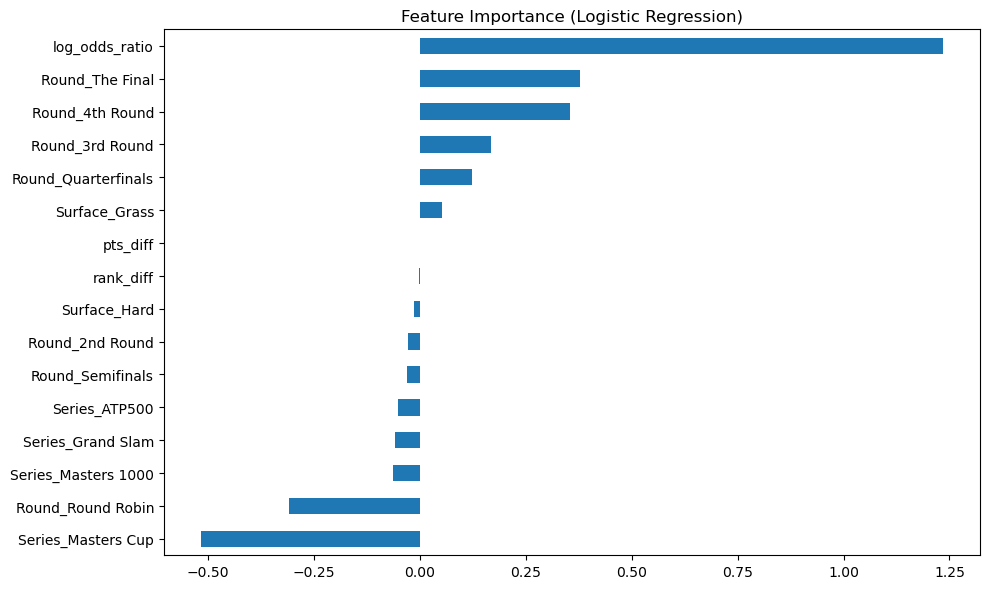

In [12]:
# Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_prob):.3f}")

# Optional: Feature importance
importance = pd.Series(model.coef_[0], index=X.columns).sort_values()
plt.figure(figsize=(10, 6))
importance.plot(kind='barh')
plt.title('Feature Importance (Logistic Regression)')
plt.tight_layout()
plt.show()

In [18]:
# Assume this comes after training your model
today_matches = pd.DataFrame([
    {
        'Rank_1': 2,
        'Rank_2': 5,
        'Pts_1': 9300,
        'Pts_2': 4635,
        'Odd_1': 1.17,  # You can estimate odds manually or pull from a site
        'Odd_2': 5.00,
        'Surface': 'Grass',
        'Round': 'Semifinal',
        'Series': 'Grand Slam'
    },
    {
        'Rank_1': 1,
        'Rank_2': 6,
        'Pts_1': 10430,
        'Pts_2': 4630,
        'Odd_1': 1.40,
        'Odd_2': 3.00,
        'Surface': 'Grass',
        'Round': 'Semifinal',
        'Series': 'Grand Slam'
    }
])

In [19]:
# Same feature transformations as in training
today_matches['rank_diff'] = today_matches['Rank_2'] - today_matches['Rank_1']
today_matches['pts_diff'] = today_matches['Pts_1'] - today_matches['Pts_2']
today_matches['log_odds_ratio'] = np.log(today_matches['Odd_2'] / today_matches['Odd_1'])


In [20]:
# Select features
X_live = today_matches[['rank_diff', 'pts_diff', 'log_odds_ratio', 'Surface', 'Round', 'Series']]

# One-hot encode to match training
X_live_encoded = pd.get_dummies(X_live, columns=['Surface', 'Round', 'Series'])

# Ensure same columns as training data
X_live_encoded = X_live_encoded.reindex(columns=X.columns, fill_value=0)

In [21]:
# Predict win probability for Player_1 in each match
predicted_probs = model.predict_proba(X_live_encoded)[:, 1]

# Attach names
today_matches['Player_1'] = ['Carlos Alcaraz', 'Jannik Sinner']
today_matches['Player_2'] = ['Taylor Fritz', 'Novak Djokovic']
today_matches['Player_1_win_prob'] = predicted_probs

print(today_matches[['Player_1', 'Player_2', 'Player_1_win_prob']])

         Player_1        Player_2  Player_1_win_prob
0  Carlos Alcaraz    Taylor Fritz               0.83
1   Jannik Sinner  Novak Djokovic               0.66
